In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('goodCalibration/2017-05-29_22-59-27_with_temp.csv')

In [3]:
data.head()

,time,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,temp
0,2.001,218,251,264,258,264,266,261,NaN
1,3.001,260,258,266,260,264,268,262,NaN
2,4.001,259,258,266,258,264,267,261,NaN
3,5.001,260,258,265,258,264,266,261,NaN
4,6.001,259,258,266,258,264,267,262,NaN


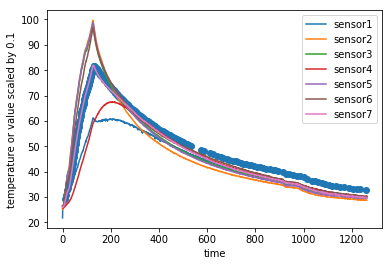

In [4]:
plt.scatter(data[['time']], data[['temp']])
for header in data.columns:
    if 'sensor' in header:
        plt.plot(data[[header]]*0.1, label=header)
ax = plt.gca()
ax.set(xlabel='time', ylabel='temperature or value scaled by 0.1')
ax.legend()


In [5]:
for header in data.columns:
    if 'sensor' in header:
        print(header, data[header].max(), data[header].argmax())

sensor1 612 127
sensor2 997 126
sensor3 987 126
sensor4 675 201
sensor5 987 126
sensor6 967 126
sensor7 819 126


In [6]:
temp_peak = data['temp'].argmax()
print(data.iloc[temp_peak])

time       131.001
sensor1    610.000
sensor2    981.000
sensor3    966.000
sensor4    595.000
sensor5    975.000
sensor6    955.000
sensor7    819.000
temp        81.600
Name: 129, dtype: float64


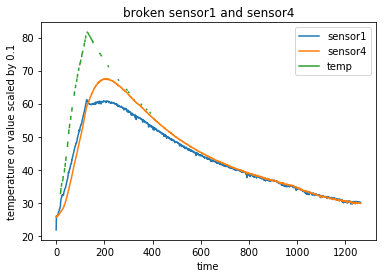

In [7]:
plt.plot(data['sensor1']*0.1)
plt.plot(data['sensor4']*0.1)
plt.plot(data['temp'])
ax = plt.gca()
ax.set(xlabel='time', ylabel='temperature or value scaled by 0.1', title='broken sensor1 and sensor4')
ax.legend()

In [8]:
rising = data.iloc[:temp_peak+1, :]
falling = data.iloc[temp_peak:, :]

In [9]:
rising.tail()

,time,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,temp
125,127.001,606,991,983,587,983,963,815,81.0
126,128.001,611,997,987,589,987,967,819,NaN
127,129.001,612,991,981,591,987,967,819,81.5
128,130.001,610,987,974,593,981,959,819,NaN
129,131.001,610,981,966,595,975,955,819,81.6


In [10]:
falling.head()

,time,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,temp
129,131.001,610,981,966,595,975,955,819,81.6
130,132.001,609,974,958,597,967,950,815,81.5
131,133.001,606,967,951,600,959,942,815,NaN
132,134.001,605,959,943,601,953,937,812,81.3
133,135.001,604,955,935,602,947,931,810,NaN


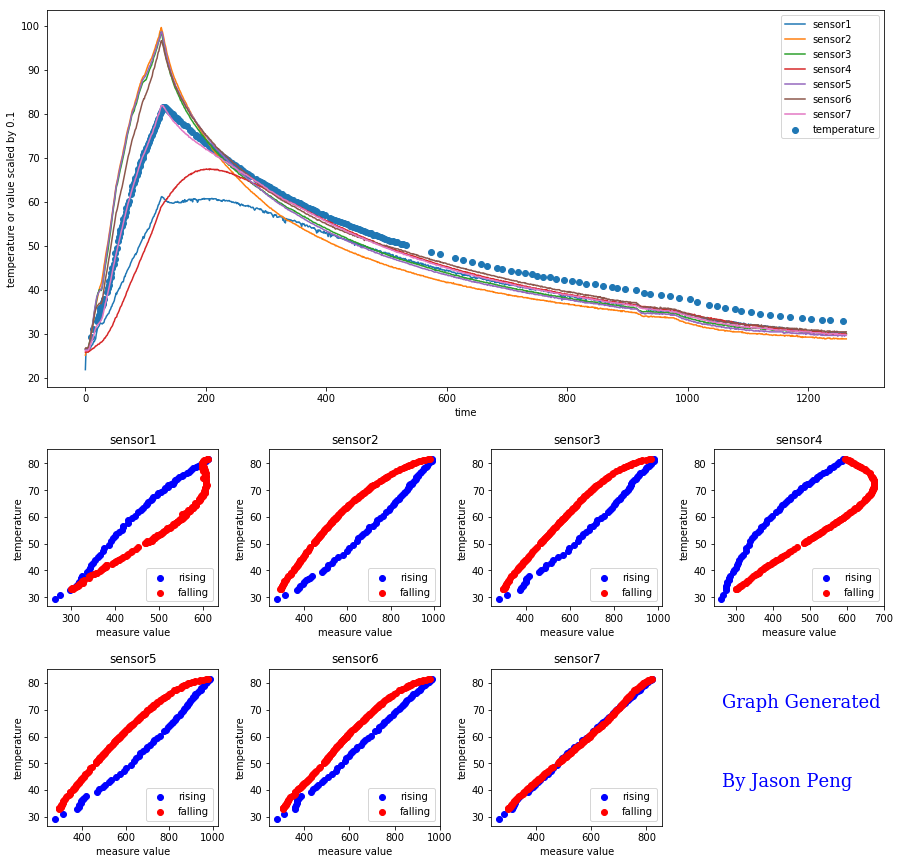

In [12]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
index = 0

ax = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=2)
ax.scatter(data[['time']], data[['temp']], label='temperature')
for header in data.columns:
    if 'sensor' in header:
        ax.plot(data[[header]]*0.1, label=header)
ax = plt.gca()
ax.set(xlabel='time', ylabel='temperature or value scaled by 0.1')
ax.legend()


for header in data.columns:
    if 'sensor' in header:       
        ax = plt.subplot2grid((4, 4), (int(index/4)+2, int(index%4)))
        index+=1
        
        ax.scatter(rising[header], rising['temp'], color='b', label='rising')
        ax.scatter(falling[header], falling['temp'], color='r', label='falling')
        ax.set(xlabel='measure value', ylabel='temperature', title=header)
        ax.legend(loc="lower right")
        
fig.subplots_adjust(hspace=0.4, wspace=0.3)

ax = plt.subplot2grid((4, 4), (int(index/4)+2, int(index%4)))
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 18,
        }
text1 = 'Graph Generated'
text2 = 'By Jason Peng'
ax.set_xlim((0,10))
ax.set_ylim((0,10))
ax.axis('off')
ax.text(0.5, 7.5, text1, fontdict=font)
ax.text(0.5, 2.5, text2, fontdict=font)

#ax.scatter(rising['time'], rising['temp'], color='b', label='rising')
#ax.scatter(falling['time'], falling['temp'], color='r', label='falling')
#ax.set(xlabel='time', ylabel='temperature', title='temperature')
#ax.legend(loc="upper right")

In [20]:
def running_average(array):
    sensor1_run_avg = []
    for i in range(1, len(sensor1)-1):
        avg = (sensor1[i-1][1]+sensor1[i][1]+sensor1[i+1][1])/3
        sensor1_run_avg.append([sensor1[i][0], avg])

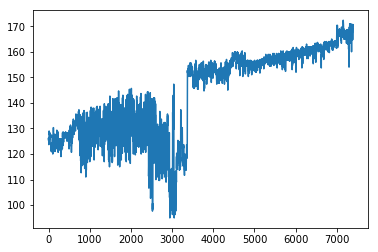

In [22]:
sensor1_run_avg = np.array(sensor1_run_avg)
plt.plot(sensor1_run_avg[:,1])